In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [39]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()


In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### preprocessing the image

In [41]:
#normalise the image into [0,1] range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)


In [42]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [43]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.3)) #this is used for avoid overfitting as we dropout the 30% of data
model.add(Dense(10,activation='softmax')) #as we have 10(from 0 to 9) number of classes

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [46]:
#callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping
Es= EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4,verbose=1)

#ModelCheckpoint
Mc = ModelCheckpoint("./model.keras", monitor='val_accuracy', verbose=1, save_best_only=True)

CallBacks = [Es, Mc]

Train the model

In [47]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.3, callbacks= CallBacks)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8534 - loss: 0.4796
Epoch 1: val_accuracy improved from -inf to 0.97211, saving model to ./model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8535 - loss: 0.4794 - val_accuracy: 0.9721 - val_loss: 0.0918
Epoch 2/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9738 - loss: 0.0829
Epoch 2: val_accuracy improved from 0.97211 to 0.98294, saving model to ./model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9738 - loss: 0.0829 - val_accuracy: 0.9829 - val_loss: 0.0577
Epoch 3/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9814 - loss: 0.0605
Epoch 3: val_accuracy improved from 0.98294 to 0.98456, saving model to ./model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9846 - val_loss: 0.0502
Epoch 4/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9849 - loss: 0.0523
Epoch 4: val_accuracy impr

In [48]:
#save the model 
save_model = keras.models.load_model('model.keras')

In [49]:
score = save_model.evaluate(x_test, y_test)
print(f"the model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0423
the model accuracy is 0.9894999861717224


<p><font color="Red", font size="5px">Here is the output of our model</font></p>


<img src="output.png" width="500" height="340">

### Model Testing

In [53]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


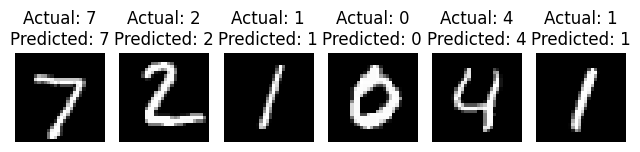

In [58]:
num_images_to_display = 6
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(y_test[i])}\nPredicted: {np.argmax(y_pred[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()